<a href="https://colab.research.google.com/github/dhruvi003/IDS-model/blob/main/ids_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]


In [ ]:
train_data = pd.read_csv("/content/KDDTrain+.txt", names=column_names)
test_data = pd.read_csv("/content/KDDTest+.txt", names=column_names)


In [ ]:
print(train_data.head())
print(test_data.head())

  duration protocol_type service  flag  src_bytes  dst_bytes  land  \
0      tcp      ftp_data      SF   491          0          0     0   
0      udp         other      SF   146          0          0     0   
0      tcp       private      S0     0          0          0     0   
0      tcp          http      SF   232       8153          0     0   
0      tcp          http      SF   199        420          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                0.17   
0               0       0    0  ...                0.00   
0               0       0    0  ...                0.10   
0               0       0    0  ...                1.00   
0               0       0    0  ...                1.00   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.03                    0.17   
0                    0.60                    0.88   
0                    0.05                    0.00   
0           

In [ ]:
combined_data = pd.concat([train_data, test_data])

In [ ]:
#print(combined_data.head())

In [ ]:
print(combined_data.shape)

(148517, 42)


In [ ]:
combined_data=combined_data.drop_duplicates()

In [ ]:
combined_data=pd.get_dummies(combined_data)

In [ ]:
le = LabelEncoder()
combined_data['label'] = le.fit_transform(combined_data['label'])

In [ ]:
X = combined_data.drop('label', axis=1)
y = combined_data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')

In [ ]:
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Evaluation Metrics:
Accuracy: 0.8953
Precision: 0.8944
Recall: 0.8953
F1-score: 0.8944


In [ ]:
# Save the model to a file
model_filename = 'rf_model.pkl'
joblib.dump(rf_classifier, model_filename)

['rf_model.pkl']

In [ ]:
# Save the scaler to a file
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

['scaler.pkl']

In [ ]:
# Deployment: Load the model and scaler, then predict on new data
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)

In [ ]:
new_data_path = "/content/KDDTest-21.txt"

In [ ]:
new_data = pd.read_csv(new_data_path, names=column_names)

In [ ]:
new_data = new_data.drop_duplicates()

In [ ]:
new_data = pd.get_dummies(new_data)

In [ ]:
new_data = new_data.reindex(columns=X.columns, fill_value=0)

In [ ]:
new_data_scaled = loaded_scaler.transform(new_data)

In [ ]:
predictions = loaded_model.predict(new_data_scaled)

In [ ]:
class_labels = loaded_model.classes_

In [ ]:
categorizations = []

In [ ]:
print(predictions)

[ 2 12 18 ... 13 15 17]


In [ ]:
for pred in predictions:
    class_label = class_labels[pred]  # Get the class label based on prediction index
    categorizations.append(class_label)

In [ ]:
label_map = {
    'normal': ['normal'],
    'attack': [
        'back', 'land', 'neptune', 'pod', 'smurf', 'teardrop',  # Denial of Service (DoS)
        'ipsweep', 'nmap', 'portsweep', 'satan',               # Probe
        'buffer_overflow', 'loadmodule', 'perl', 'rootkit',   # User-to-Root (U2R)
        'ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster'  # Remote-to-Local (R2L)
    ]
}

In [ ]:
for pred in predictions:
    class_label = class_labels[pred]  # Get the class label based on prediction index

    # Determine if the class label indicates an attack or normal
    if class_label in label_map['normal']:
        categorizations.append("Normal")
    elif class_label in label_map['attack']:
        categorizations.append("Attack")
    else:
        categorizations.append("Unknown")  # Handle unexpected labels if necessary


In [ ]:
for i, categorization in enumerate(categorizations):
    print(f"Instance {i}: Predicted Category - {categorization}")

Streaming output truncated to the last 5000 lines.
Instance 18444: Predicted Category - Unknown
Instance 18445: Predicted Category - Unknown
Instance 18446: Predicted Category - Unknown
Instance 18447: Predicted Category - Unknown
Instance 18448: Predicted Category - Unknown
Instance 18449: Predicted Category - Unknown
Instance 18450: Predicted Category - Unknown
Instance 18451: Predicted Category - Unknown
Instance 18452: Predicted Category - Unknown
Instance 18453: Predicted Category - Unknown
Instance 18454: Predicted Category - Unknown
Instance 18455: Predicted Category - Unknown
Instance 18456: Predicted Category - Unknown
Instance 18457: Predicted Category - Unknown
Instance 18458: Predicted Category - Unknown
Instance 18459: Predicted Category - Unknown
Instance 18460: Predicted Category - Unknown
Instance 18461: Predicted Category - Unknown
Instance 18462: Predicted Category - Unknown
Instance 18463: Predicted Category - Unknown
Instance 18464: Predicted Category - Unknown
Inst

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


In [ ]:
class_labels = le.classes_

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Axes: >

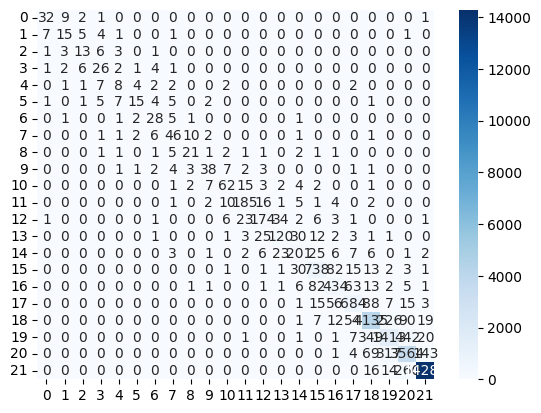

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

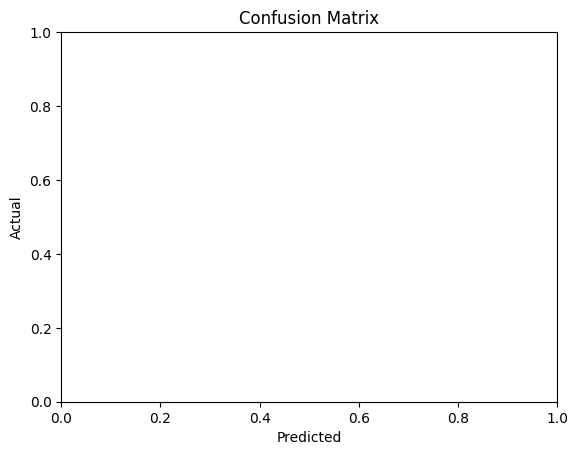

In [ ]:
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [ ]:
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])


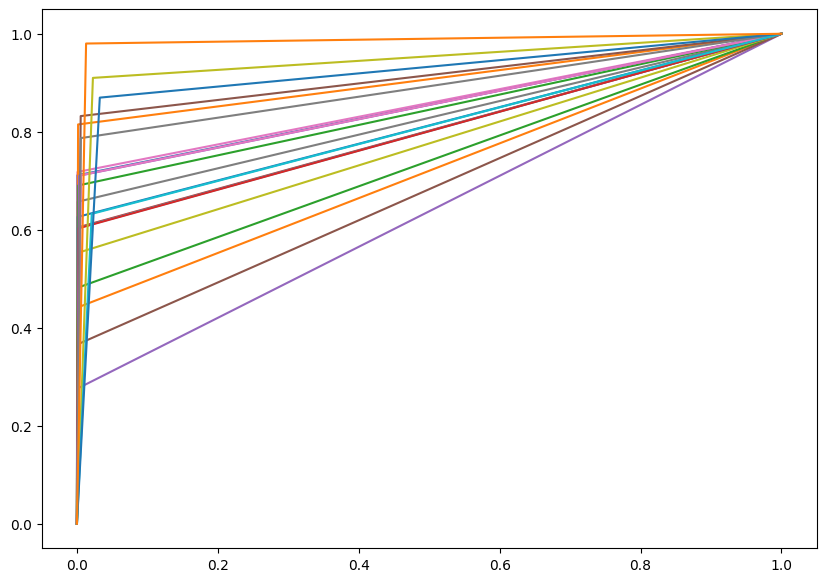

In [ ]:
plt.figure(figsize=(10, 7))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:.2f})')


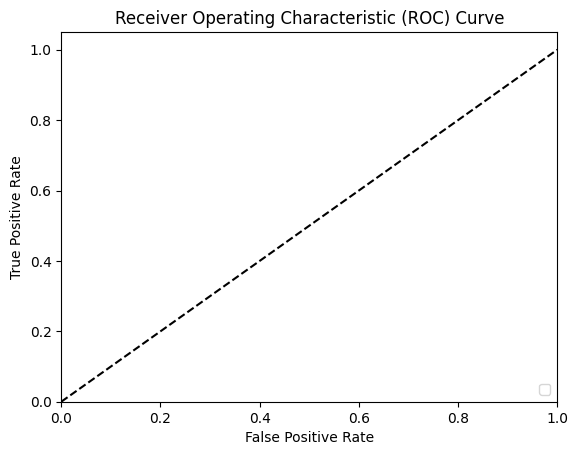

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
precision = dict()
recall = dict()


In [ ]:
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred == i)


In [ ]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

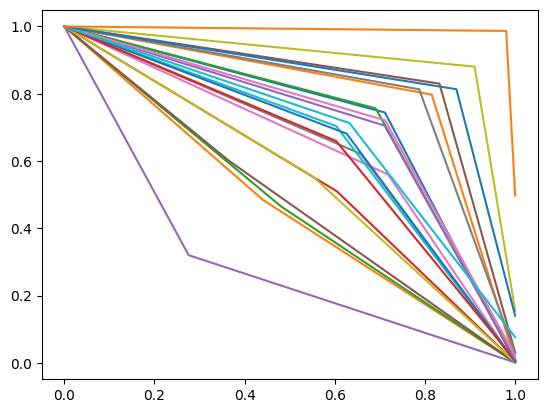

In [ ]:
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve of class {class_labels[i]}')


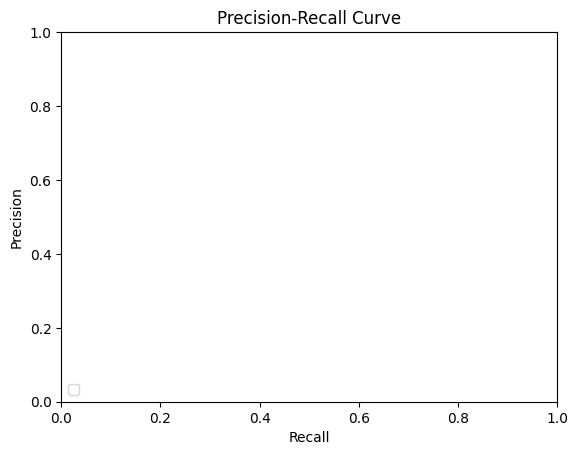

In [ ]:
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, mean_squared_error


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.5575
